In [2]:
try:
    output_filepath
except:
    output_filepath = 's3://workspaces-clarity-mgmt-pro/jaime.oliver/misc/social_capital/data/processed/'

In [3]:
import os
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


In [4]:
data_path = os.path.join(output_filepath, 'panel_data.parquet')
df_model = pd.read_parquet(data_path)
centralities = ['authorities', 'hubs', 'pagerank', 'gfi', 'bridging', 'favor']

df_model.eval('gdp_per_capita = gdp/wkn_population', inplace=True)
df_model.eval('productivity = gdp*10**6/(wkn_population**0.3*GFCF**0.7)', inplace=True)

df_model = df_model[~df_model.country.isin(['ETH', 'BLR', 'ZWE', 'MDA', 'GUY', 'VNM', 'MAC', 'PSE', 'AGO', 'COD', 'TZA'])]
#df_model = df_model[df_model.wkn_population>1.e6]

/home/ubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite

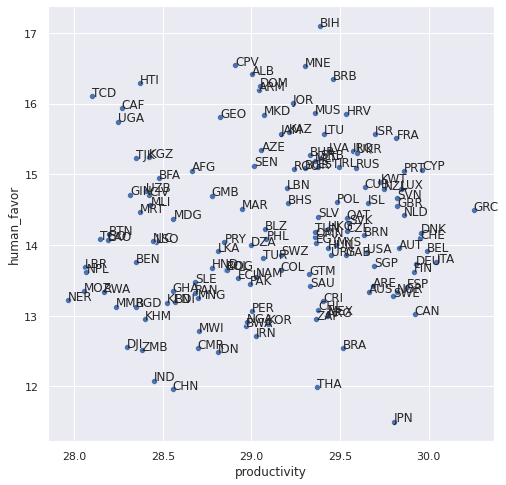

In [9]:
network = 'human'
#network = 'financial'
#network = 'goods'

centrality = 'hubs'
#centrality = 'authorities'
#centrality = 'pagerank'
centrality = 'favor'
#centrality = 'bridging'

x_var = 'productivity'
#x_var = 'gdp_per_capita'

#x_var = f'financial_hubs'
y_var = f'{network}_{centrality}'

df_plot =  df_model[df_model.year.between(1995, 2016)]
df_plot =  df_model[df_model.year == 2015]

for c in [x_var, y_var]:
    df_plot[c] = df_plot[c].map(lambda x: np.log1p(x*1.e8))

fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=df_plot, x=x_var, y=y_var, ax=ax)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(df_plot[x_var], df_plot[y_var], df_plot['country'], plt.gca())

In [8]:
df

,country,year,gini,wkn_population,log_wkn_population,lag_log_wkn_population,delta_log_wkn_population,financial_hubs,financial_authorities,financial_pagerank,...,per_change_log_gdp,lag_log2_output,lag_log2_gdp,GFCF,log_GFCF,lag_log_GFCF,delta_log_GFCF,constant,gdp_per_capita,productivity
42,AFG,2002,NaN,5554075.0,15.530043,15.476737,0.053306,1.877694e-03,1.726421e-03,0.003450,...,0.008079,15.774451,15.055837,5.092205e+08,20.048392,NaN,NaN,1,0.712156,30127.913718
43,AFG,2003,NaN,5875424.0,15.586289,15.530043,0.056246,2.299248e-03,2.142295e-03,0.003062,...,0.011205,15.785842,15.068846,5.761355e+08,20.171853,20.048392,0.123462,1,0.798125,32213.004706
44,AFG,2004,NaN,6193483.0,15.639008,15.586289,0.052719,2.182385e-03,2.020954e-03,0.003119,...,0.006294,15.910259,15.190584,9.933671e+08,20.716611,20.171853,0.544757,1,0.833993,23852.831779
45,AFG,2005,NaN,6485734.0,15.685116,15.639008,0.046107,2.323089e-03,2.101791e-03,0.003213,...,0.010197,16.090556,15.360799,1.440132e+09,21.088001,20.716611,0.371390,1,0.932372,21236.306356
46,AFG,2006,NaN,6633635.0,15.707664,15.685116,0.022548,2.101409e-03,1.973730e-03,0.003319,...,0.008343,16.196709,15.457478,1.840975e+09,21.333561,21.088001,0.245560,1,1.038426,20233.365556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665,ZMB,2015,NaN,6423437.0,15.675464,15.640247,0.035217,1.727528e-03,1.567381e-03,0.003704,...,0.000358,17.548028,16.829315,9.090346e+09,22.930479,22.947118,-0.016639,1,3.396944,21160.178124
5666,ZMB,2016,NaN,6650519.0,15.710206,15.675464,0.034742,1.727528e-03,1.567381e-03,0.003704,...,0.000000,17.586203,16.892299,8.006022e+09,22.803460,22.930479,-0.127019,1,3.280955,22887.977682
5667,ZMB,2017,NaN,6888188.0,15.745319,15.710206,0.035113,4.231746e-08,3.347186e-08,0.003684,...,0.003384,17.580826,16.898340,1.060672e+10,23.084754,22.803460,0.281294,1,3.354167,19694.791332
5668,ZMB,2018,NaN,7134980.0,15.780520,15.745319,0.035201,1.880490e-08,1.570125e-08,0.003837,...,0.001462,17.580826,16.898340,1.036745e+10,23.061937,23.084754,-0.022817,1,3.319441,20298.757571


In [6]:
from linearmodels.panel import PanelOLS, PooledOLS
import patsy

df=df_model.dropna(subset = ['human_favor', 'productivity'])
df['human_favor'] =  df['human_favor'].map(lambda x: np.log1p(x*1.e8))

f = f'productivity ~ human_favor + 1'
#f = f'log_gdp ~ log_GFCF + log_wkn_population + human_favor + 1'
y, X = patsy.dmatrices(f, df.set_index(['country','year']),return_type='dataframe')
base_model_fe = PanelOLS(y,X, entity_effects=True, time_effects=True)
#base_model_fe = PooledOLS(y, X)
base_model_fe = base_model_fe.fit()
base_model_fe

/home/ubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Dep. Variable:,productivity,R-squared:,0.0243
Estimator:,PanelOLS,R-squared (Between):,-0.2070
No. Observations:,4220,R-squared (Within):,0.0271
Date:,"Fri, Aug 27 2021",R-squared (Overall):,-0.1172
Time:,14:30:28,Log-likelihood,-4.56e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,100.72
Entities:,154,P-value,0.0000
Avg Obs:,27.403,Distribution:,"F(1,4036)"
Min Obs:,1.0000,,
Max Obs:,30.000,F-statistic (robust):,100.72


## Deep dive human hits

In [ ]:
df_model.human_authorities.map(lambda x: np.log1p(x*1.e6)).plot(kind='kde')

In [ ]:
df_model.groupby('country').human_authorities_cero.nunique().sort_values().tail(10)

In [ ]:
df_model.groupby('country').year.nunique().sort_values()

In [ ]:
df_model[df_model.receiving_cuntries].groupby('country').human_authorities_cero.nunique()